Accuracy:  0.0328654570352619


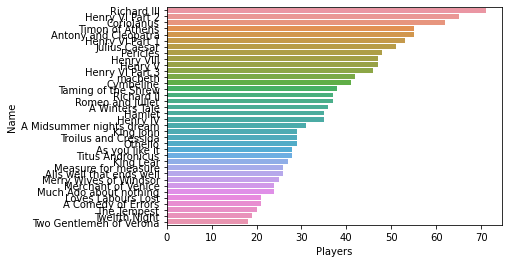

In [40]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import numpy as np
from IPython import get_ipython
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

dataSetFile = pd.read_csv("C:\\Users\Brian\Desktop\Shakespeare_data.csv")
get_ipython().run_line_magic('matplotlib', 'inline')

players = dataSetFile.Player.unique()
i = 0
LP = dict()
for player in players:
   LP[player] = i
   i = i + 1
   
newData = dataSetFile.replace({"Player": LP})

newData = newData.dropna()

X_training, X_test, Y_training, Y_test = train_test_split(newData.PlayerLine, newData.Player, random_state=1)

count_vect = CountVectorizer()
X_training_counts = count_vect.fit_transform(X_training)
tfidf_transformer = TfidfTransformer()
X_training_tfidf = tfidf_transformer.fit_transform(X_training_counts)


training_totals = MultinomialNB().fit(X_training_tfidf, Y_training)

print("Accuracy: ", training_totals.score(count_vect.transform(X_test), Y_test))

numberOfPlayers = dataSetFile.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberOfPlayers['Play'] = numberOfPlayers.index.tolist()
numberOfPlayers.columns = ['Num Players','Play']
numberOfPlayers.index= np.arange(0,len(numberOfPlayers))
numberOfPlayers

graph = sns.barplot(x='Num Players',y='Play',data=numberOfPlayers)
graph.set(xlabel='Players', ylabel='Name')
plt.pyplot.show()

